In [18]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, RealData

from dotenv import load_dotenv
load_dotenv(override=True)

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)
from main_code.utils.constants import *
from main_code.utils.functions import *
from main_code.utils.CosmoFunc import *

df_combined = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df_combined = pd.concat([df_combined, df_temp], axis=0).reset_index(drop=True)

def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

# Logdist trend vs richness
## SDSS

(0.9, 262.03292228993917)

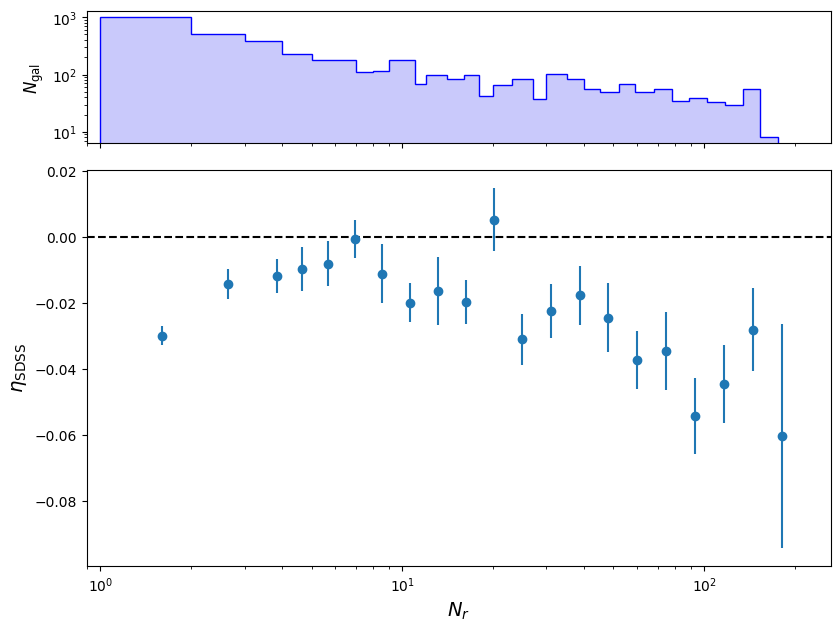

In [70]:
survey = "SDSS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

# 6dFGS

(0.9, 262.03292228993917)

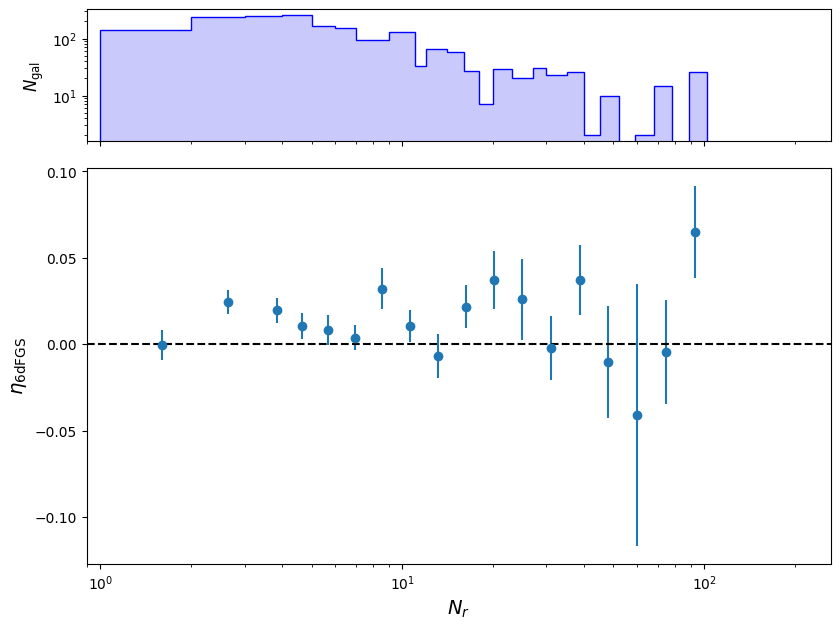

In [71]:
survey = "6dFGS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

# LAMOST

(0.9, 262.03292228993917)

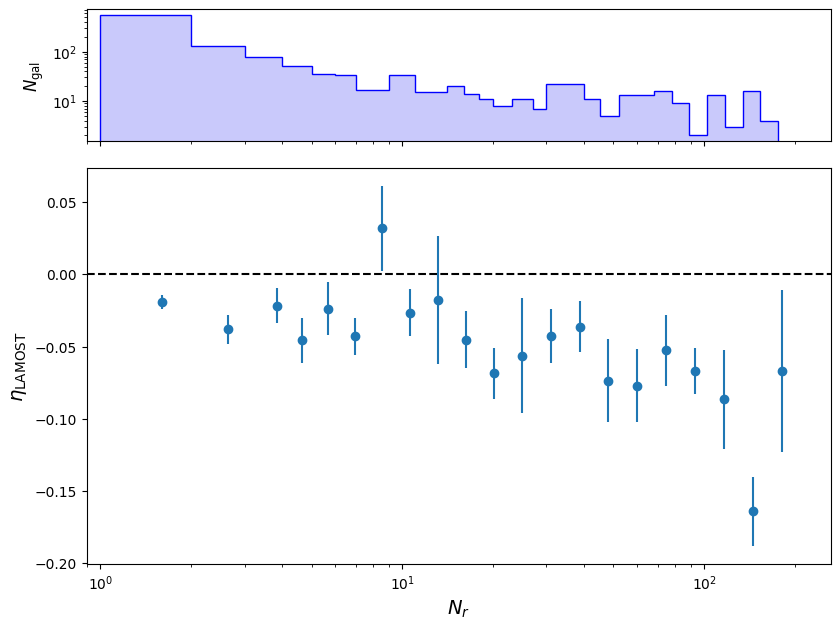

In [14]:
survey = "LAMOST"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Divide by NGC and SGC subsamples
df_ = df.copy()
df_ = df_[(df_["ra"] <= 80.0) | (df_["ra"] >= 300.0)]

df["sgc"] = df["tmass"].apply(lambda x: x in df_["tmass"].tolist())
df["sgc"] = df["sgc"].astype(int)

# Pick SGC subsample
df = df[df["sgc"] == 0]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

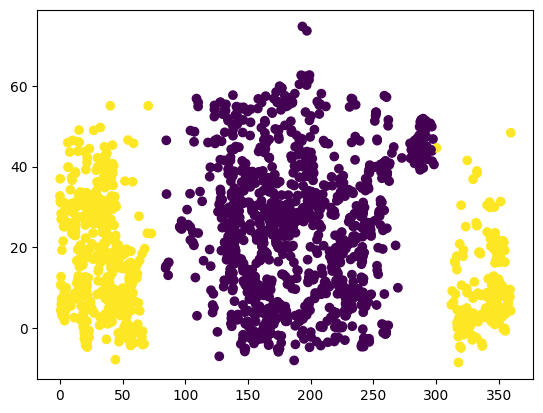

In [11]:
df_ = df.copy()
df_ = df_[(df_["ra"] <= 80.0) | (df_["ra"] >= 300.0)]
# plt.scatter(df_["ra"], df_["dec"])

df2 = df.copy()
df2 = df2[~df2["tmass"].isin(df_["tmass"].tolist())]
# plt.scatter(df2["ra"], df2["dec"])

df["sgc"] = df["tmass"].apply(lambda x: x in df_["tmass"].tolist())
df["sgc"] = df["sgc"].astype(int)
df

plt.scatter(df["ra"], df["dec"], c=df["sgc"])

# After fitting each richness bin

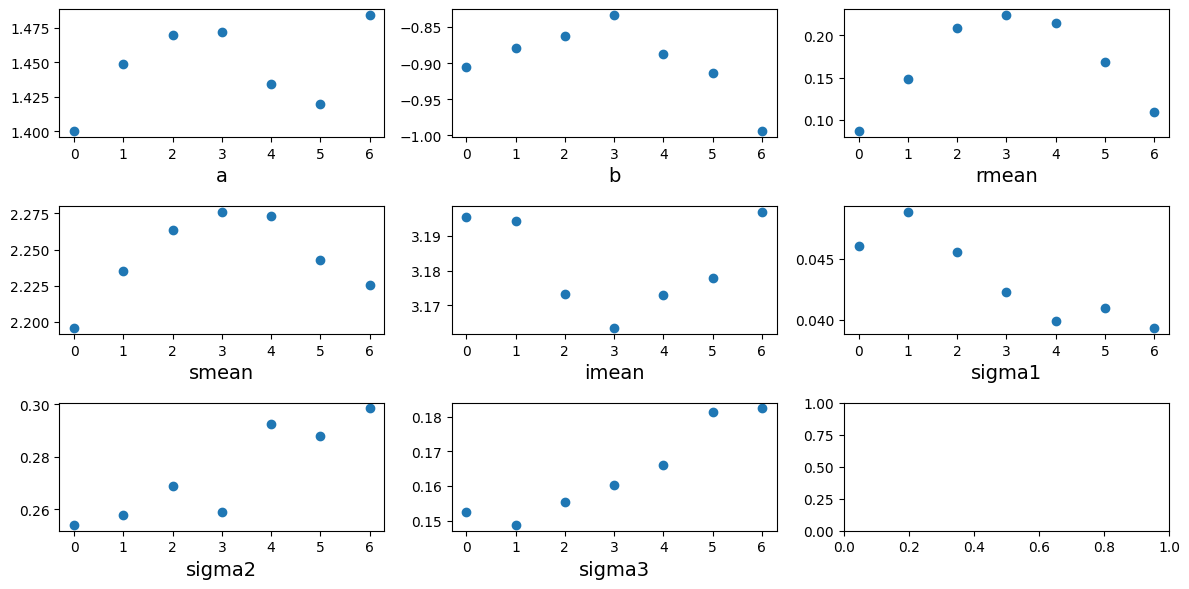

In [28]:
fp_fit = pd.read_csv("../../experiments/experiment_007_richness_analysis/sdss_fp_fit.csv")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8 * 1.5, 6))
for i, col in enumerate(fp_fit.columns[:8]):
    ax = fig.axes[i]
    ax.scatter(fp_fit["richness_bin"], fp_fit[col])
    ax.set_xlabel(col, fontsize=14)

fig.tight_layout()

(0.9, 307.4805415805105)

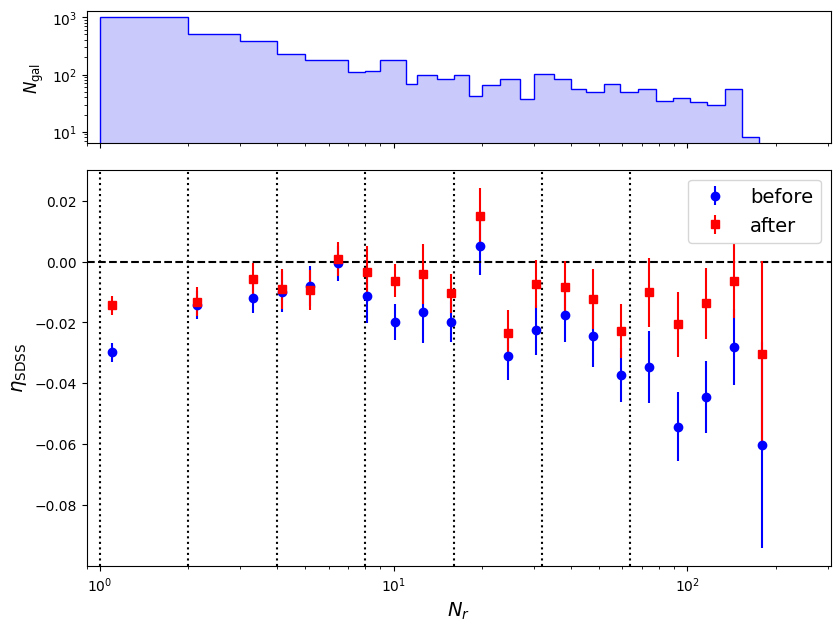

In [17]:
survey = "SDSS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', c='b', label="before")
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

#######################
df = pd.read_csv("./sdss_final.csv")

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='s', c='r', label="after")
ax2.legend(fontsize=14)

richness_bin_vert = df["richness_lower_limit"].unique().tolist()
for _ in richness_bin_vert:
    ax2.axvline(x=_, c='k', ls=":")

ax2.set_xlim(left=0.9)

Text(0, 0.5, '$eta$ after (richness-based FP)')

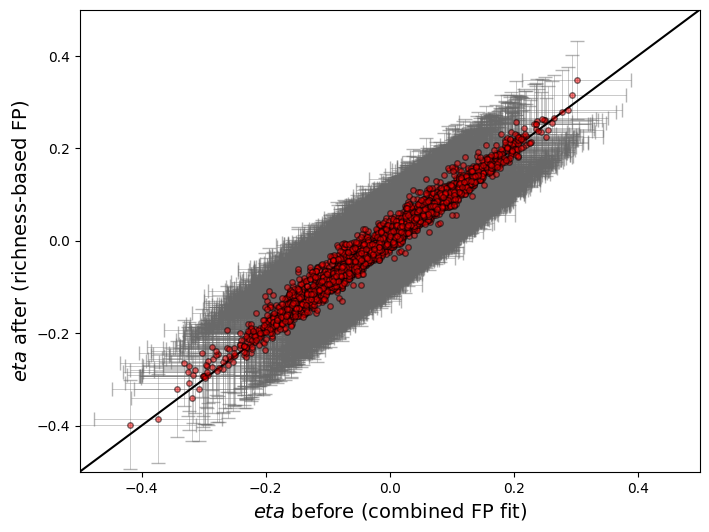

In [36]:
# Combined FP fit logdists
df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
df1 = df1[["tmass", "logdist_all_combined", "logdist_err_all_combined"]]

# Richness-based FP fit logdists
df2 = pd.read_csv("../../experiments/experiment_007_richness_analysis/sdss_final.csv")
df2 = df2[["tmass", "logdist_sdss", "logdist_err_sdss"]]

# Merge
df = df1.merge(df2, on="tmass")

fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(df["logdist_all_combined"], df["logdist_sdss"], xerr=df["logdist_err_all_combined"], yerr=df["logdist_err_sdss"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.5)
ax.plot([-0.5, 0.5], [-0.5, 0.5], c='k')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel(r"$eta$ before (combined FP fit)", fontsize=14)
ax.set_ylabel(r"$eta$ after (richness-based FP)", fontsize=14)

In [30]:
df1

,tmass,logdist_all_combined,logdist_err_all_combined
0,2MASXJ09545075+5235243,0.159442,0.090238
1,2MASXJ11134133+0745459,-0.032448,0.094230
2,2MASXJ08100249+2251416,0.035811,0.094419
3,2MASXJ15330725+0445203,-0.011395,0.096363
4,2MASXJ12591227+3554350,-0.017591,0.091567
...,...,...,...
4428,2MASXJ16330166+2247500,0.056179,0.091647
4429,2MASXJ11474317+3256514,-0.055044,0.096444
4430,2MASXJ13142059+1233094,-0.231180,0.100871
4431,2MASXJ12030810+1109211,0.047388,0.097497


# Richness vs Absolute Magnitude

## Step 1: Derive liear fit of log-distance ratio vs absolute magnitude for SDSS

Slope:  -0.0502
Intercept:  -1.146


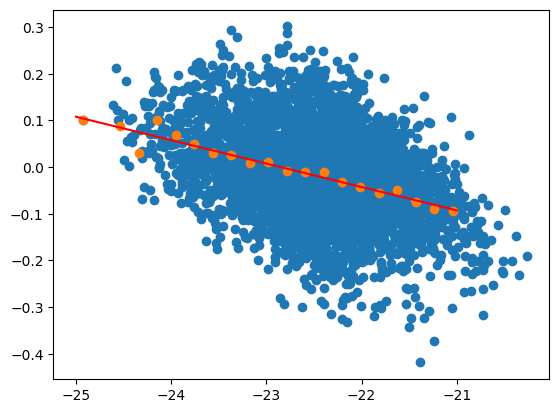

In [5]:
# Linear function
def linear_func(x, m, c):
    return m * x + c

survey = "SDSS"

# Load log-distance ratio
df = pd.read_csv(f'../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv')

# Calculate J-band absolute magnitude
red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
d_L = (1 + df["zhelio"]) * d_C * 10**6
df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]
# df["absMag_j"] += 3.52 * df["logdist_all_combined"]


# Calculate absolute magnitude rolling mean
x_param = "absMag_j"
window_size = 0.1
x_pts = np.linspace(df[x_param].min(), df[x_param].max(), 25)

x_trials = []
logdist_means = []
logdist_stds = []
logdist_stderrs = []
for x in x_pts:
    x_lower = x - window_size / 2
    x_upper = x + window_size / 2
    _ = df[(df[x_param] >= x_lower) & (df[x_param] <= x_upper)]
    if not len(_):
        continue

    logdist_mean = _["logdist_all_combined"].mean()
    logdist_std = _["logdist_all_combined"].std()
    logdist_stderr = _["logdist_all_combined"].std() / np.sqrt(len(_))
    
    x_trials.append(x)
    logdist_means.append(logdist_mean)
    logdist_stds.append(logdist_std)
    logdist_stderrs.append(logdist_stderr)

x_trials = np.array(x_trials)
logdist_means = np.array(logdist_means)
logdist_stds = np.array(logdist_stds)
logdist_stderrs = np.array(logdist_stderrs)

logdist_means = logdist_means[x_trials < -21]
logdist_stds = logdist_stds[x_trials < -21]
x_trials = x_trials[x_trials < -21]

plt.scatter(df["absMag_j"], df["logdist_all_combined"])
plt.scatter(x_trials, logdist_means)

# Fit linear relationship
popt, pcov = curve_fit(linear_func, x_trials, logdist_means, p0=[-0.1, -10])
# popt, pcov = curve_fit(linear_func, df['absMag_j'].to_numpy(), df['logdist_all_combined'].to_numpy(), p0=[-0.1, -10])

x_ = np.linspace(-25, -21, 100)
y_ = linear_func(x_, popt[0], popt[1])
plt.plot(x_, y_, c='r')

print("Slope: ", np.round(popt[0], 4))
print("Intercept: ", np.round(popt[1], 4))

## Step 2: Calculate median absolute magnitude for each richness bin + logdist prediction

In [16]:
# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

# Median richness in each bin
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
absmag_binned_median = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).median().values.ravel()

# Predicttion from linear relation
logdist_pred = linear_func(absmag_binned_median, popt[0], popt[1])
logdist_pred_err = 0.08

## Step 3: Plot actual vs prediction

(0.9, 262.03292228993917)

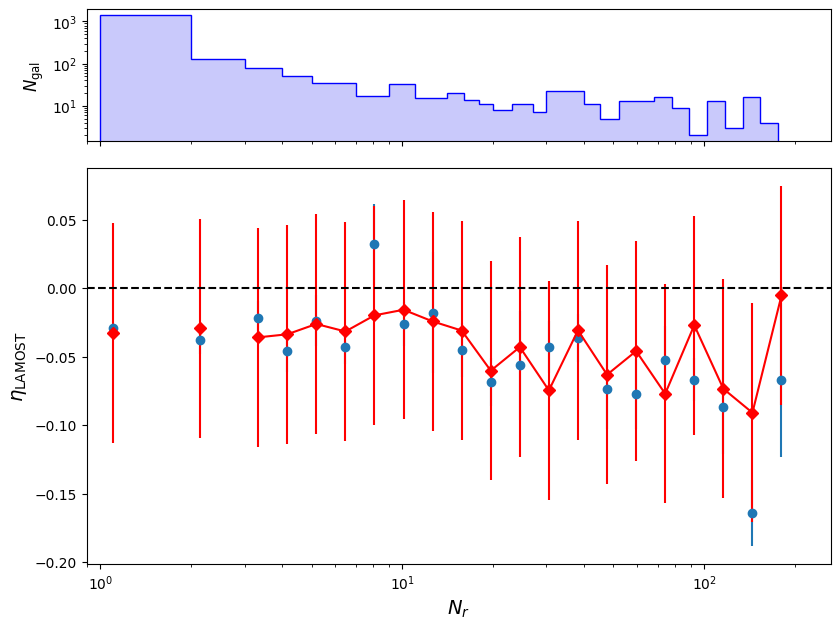

In [17]:
survey = "LAMOST"
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
# ax2.scatter(richness_bins_middle, logdist_pred, c='r', marker='D')
ax2.errorbar(richness_bins_middle, logdist_pred, yerr=logdist_pred_err, c='r', marker='D')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

## Step 4: Sanity check

In [24]:
# Richest cluster
df_ = df[(df["Nr"] > 160) & (df["Nr"] <= 200)]

# Median absolute magnitude
median_absmag = df_["absMag_j"].median()
print("Median absolute magnitude: ", median_absmag)

# Prediction
pred_logdist = linear_func(median_absmag, popt[0], popt[1])
print("Predicted log-distance ratio: ", pred_logdist)

# Actual
mean_logdist = df_["logdist_all_combined"].mean()
median_logdist = df_["logdist_all_combined"].median()
print("Mean logdist: ", mean_logdist)
print("Median logdist: ", median_logdist)

Median absolute magnitude:  -22.920744592708985
Predicted log-distance ratio:  0.0035194569535554887
Mean logdist:  -0.05944414977830316
Median logdist:  -0.0602628121846282


# Predict log-distance ratio from individual absolute magnitude

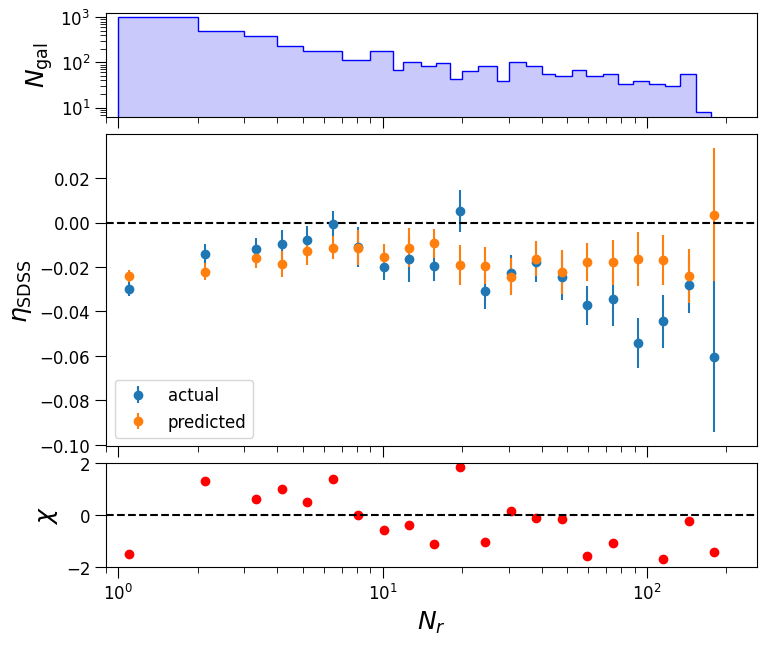

In [39]:
# Create the bins
survey = "SDSS"

# Load log-distance ratio
df = pd.read_csv(f'../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv')

# Calculate J-band absolute magnitude
red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
d_L = (1 + df["zhelio"]) * d_C * 10**6
df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]

# Predict log-distance ratio from the trend
df['logdist_pred'] = linear_func(df['absMag_j'].to_numpy(), *popt)

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(7 * scale, 6 * scale), height_ratios=[1, 3, 1], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=18)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

# Predicted logdist from logdist vs absolute magnitude relation
err_absmag_relation = 0.08
logdist_pred_binned_mean = df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_pred_binned_stderr = np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()**2 + err_absmag_relation**2) / np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', label='actual')
ax2.errorbar(richness_bins_middle, logdist_pred_binned_mean, yerr=logdist_pred_binned_stderr, fmt='o', label='predicted')

ax2.legend(loc="lower left", fontsize=12)
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=18)

# Calculate statistical significance
chisq = (logdist_binned_mean - logdist_pred_binned_mean) / np.sqrt(logdist_binned_stderr**2 + logdist_pred_binned_stderr**2)
ax3.scatter(richness_bins_middle, chisq, c='r', marker='o')
ax3.axhline(y=0, c='k', ls='--')

ax3.set_ylabel(r"$\chi$", fontsize=18)
ax3.set_xlabel(r"$N_r$", fontsize=18)
ax3.set_xscale("log")
ax3.set_xlim(left=0.9)
ax3.set_ylim(-2, 2)

for ax in fig.axes:
    ax.tick_params(axis='both', which='both', labelsize=12, direction="out")
    ax.tick_params(axis='both', which='major', length=8)
    ax.tick_params(axis='both', which='minor', length=4)

fig.savefig('./sdss_richness.pdf', bbox_inches='tight', dpi=300)

# Absolute magnitude vs richness

(0.9, 262.03292228993917)

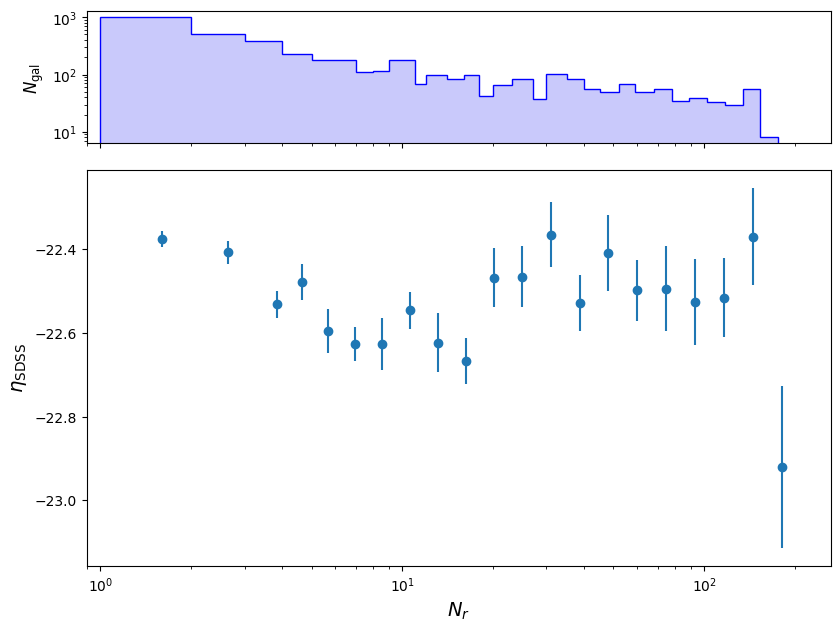

In [4]:
survey = "SDSS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Calculate J-band absolute magnitude
red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
d_L = (1 + df["zhelio"]) * d_C * 10**6
df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
# ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

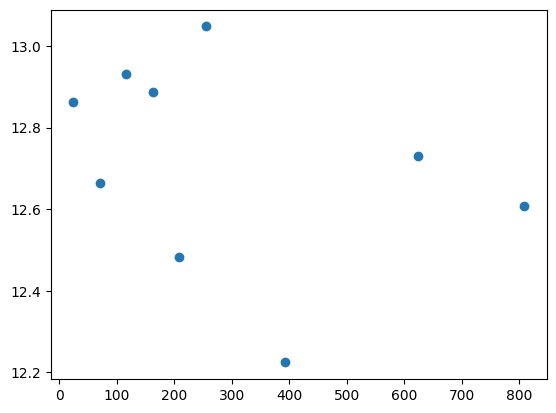

In [34]:
x = df["Nr"].to_numpy()
y = (df["j_m_ext"] - df["extinction_j"]).to_numpy()

x_bin, y_bin, y_bin_err, y_bin_stderr = bin_data(x, y, xmin=x.min(), xmax=x.max(), n_bin=20)

plt.scatter(x_bin, y_bin)

(array([2.000e+00, 1.000e+00, 9.000e+00, 1.900e+01, 4.900e+01, 9.400e+01,
        1.900e+02, 3.930e+02, 6.400e+02, 8.960e+02, 1.389e+03, 2.664e+03,
        6.044e+03, 8.678e+03, 8.515e+03, 3.892e+03, 5.090e+02, 5.600e+01,
        1.300e+01, 6.000e+00]),
 array([-0.148553  , -0.13721305, -0.1258731 , -0.11453315, -0.1031932 ,
        -0.09185325, -0.0805133 , -0.06917335, -0.0578334 , -0.04649345,
        -0.0351535 , -0.02381355, -0.0124736 , -0.00113365,  0.0102063 ,
         0.02154625,  0.0328862 ,  0.04422615,  0.0555661 ,  0.06690605,
         0.078246  ]),
 <BarContainer object of 20 artists>)

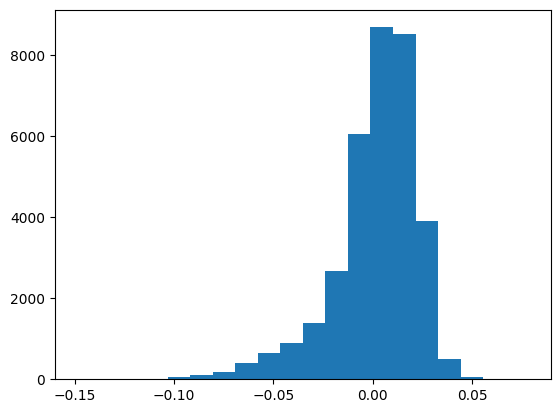

In [5]:
df = pd.read_csv("../../data/external/logdist/cullan_logdist.csv")

plt.hist(df["logdist"] - df["logdist_corr"], bins=20)

(-0.4, 0.4)

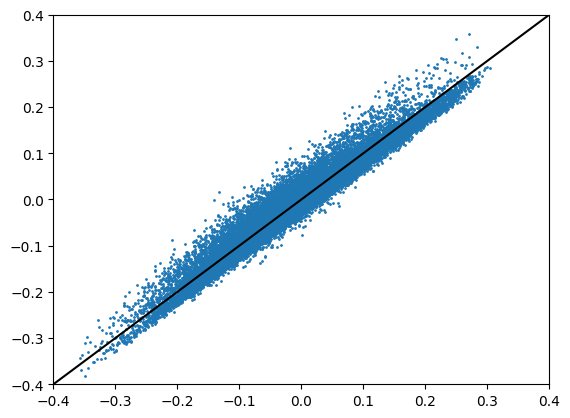

In [8]:
plt.scatter(df["logdist"], df["logdist_corr"], s=1)
plt.plot([-0.4, 0.4], [-0.4, 0.4], c='k')
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)

# Fit linear relationship to logdist-richness trend

/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_5048/2722776620.py:78: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.errorbar(richness_bins_middle * (base ** i), logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', mec=survey_colors[i], mfc=survey_colors[i], marker=survey_shapes[i], ecolor=survey_colors[i], alpha=ALPHA)
/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_5048/2722776620.py:79: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.errorbar(richness_bins_middle * (base ** (i+1)), logdist_pred_binned_mean, yerr=logdist_pred_binned_stderr, fmt='o', marker=survey_shapes[i], mfc='none', mec=survey_colors[i], ecolor=survey_colors[i], alpha=ALPHA)
/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_5048/2722776620.py:78: 

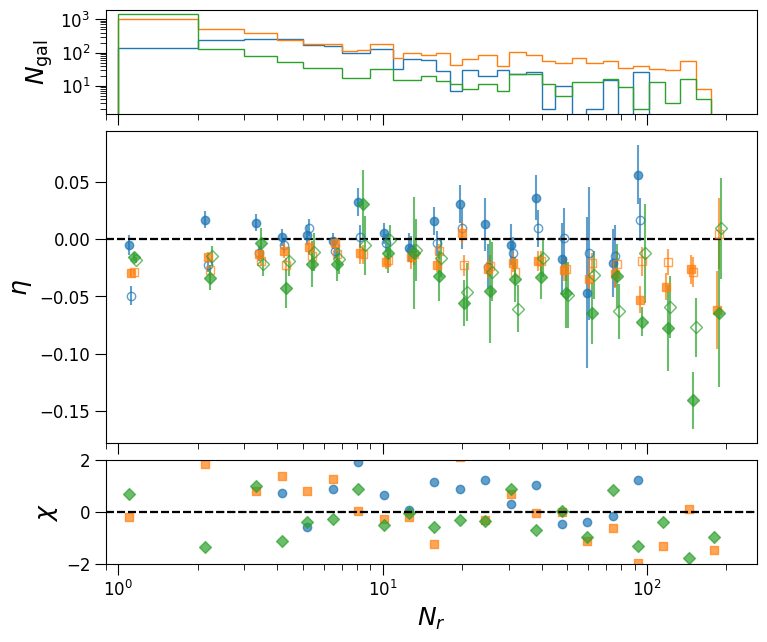

In [2]:
# Linear function
def linear_func(x, m, c):
    return m * x + c

survey_colors = ["C0", "C1", "C2"]
survey_shapes = ["o", "s", "D"]
ALPHA = 0.7
fp_method = "common_abc"

scale = 1.2
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(7 * scale, 6 * scale), height_ratios=[1, 3, 1], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
for i, survey in enumerate(SURVEY_LIST):
    # Load log-distance ratio
    df = pd.read_csv(f'../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv')

    # Calculate J-band absolute magnitude
    red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
    d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
    d_L = (1 + df["zhelio"]) * d_C * 10**6
    df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]

    # Calculate absolute magnitude rolling mean
    x_param = "absMag_j"
    window_size = 0.1
    x_pts = np.linspace(df[x_param].min(), df[x_param].max(), 25)

    x = df["absMag_j"].to_numpy()
    y = df[f"logdist_{fp_method}"].to_numpy()
    yerr = df[f"logdist_err_{fp_method}"].to_numpy()

    x_bin, y_bin, y_bin_err, y_bin_stderr = bin_data_error_weighting(x, y, yerr, x.min(), x.max(), 15)

    # Fit linear relationship
    popt, pcov = curve_fit(linear_func, x_bin, y_bin, p0=[-0.1, -10])

    x_ = np.linspace(x.min(), x.max(), 100)
    y_ = linear_func(x_, popt[0], popt[1])

    # Richness bins
    richness_bins = np.logspace(-0.01, np.log10(200), 25)
    richness_bins_labels = range(1, len(richness_bins))

    # Median richness in each bin
    df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
    absmag_binned_median = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).median().values.ravel()

    # Predicttion from linear relation
    logdist_pred = linear_func(absmag_binned_median, popt[0], popt[1])
    logdist_pred_err = 0.08

    # Predict log-distance ratio from the trend
    df['logdist_pred'] = linear_func(df['absMag_j'].to_numpy(), *popt)

    # Richness bins
    richness_bins = np.logspace(-0.01, np.log10(200), 25)
    richness_bins_labels = range(1, len(richness_bins))

    # Histogram of group richness
    histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
    ax1.hist(df["Nr"], bins=histogram_bins, edgecolor=survey_colors[i], histtype='step')
    ax1.set_yscale("log")
    ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=18)

    # Trend of logdist vs richness
    df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
    richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
    logdist_binned_mean = df[['richness_bin', f"logdist_{fp_method}"]].groupby(by='richness_bin', observed=False).median().values.ravel()
    logdist_binned_std = df[['richness_bin', f"logdist_{fp_method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
    logdist_binned_stderr = df[['richness_bin', f"logdist_{fp_method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', f"logdist_{fp_method}"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

    # Predicted logdist from logdist vs absolute magnitude relation
    err_absmag_relation = 0.08
    logdist_pred_binned_mean = df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).median().values.ravel()
    logdist_pred_binned_stderr = np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()**2 + err_absmag_relation**2) / np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

    base = 1.02
    ax2.errorbar(richness_bins_middle * (base ** i), logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', mec=survey_colors[i], mfc=survey_colors[i], marker=survey_shapes[i], ecolor=survey_colors[i], alpha=ALPHA)
    ax2.errorbar(richness_bins_middle * (base ** (i+1)), logdist_pred_binned_mean, yerr=logdist_pred_binned_stderr, fmt='o', marker=survey_shapes[i], mfc='none', mec=survey_colors[i], ecolor=survey_colors[i], alpha=ALPHA)

    ax2.axhline(y=0, c='k', ls='--')
    ax2.set_ylabel(r"$\eta$".replace("survey", survey), fontsize=18)

    # Calculate statistical significance
    chisq = (logdist_binned_mean - logdist_pred_binned_mean) / np.sqrt(logdist_binned_stderr**2 + logdist_pred_binned_stderr**2)
    ax3.scatter(richness_bins_middle, chisq, c=survey_colors[i], marker=survey_shapes[i], alpha=ALPHA)
    ax3.axhline(y=0, c='k', ls='--')

    ax3.set_ylabel(r"$\chi$", fontsize=18)
    ax3.set_xlabel(r"$N_r$", fontsize=18)
    ax3.set_xscale("log")
    ax3.set_xlim(left=0.9)
    ax3.set_ylim(-2, 2)

    for ax in fig.axes:
        ax.tick_params(axis='both', which='both', labelsize=12, direction="out")
        ax.tick_params(axis='both', which='major', length=8)
        ax.tick_params(axis='both', which='minor', length=4)

## binned data

-2.086490794460486

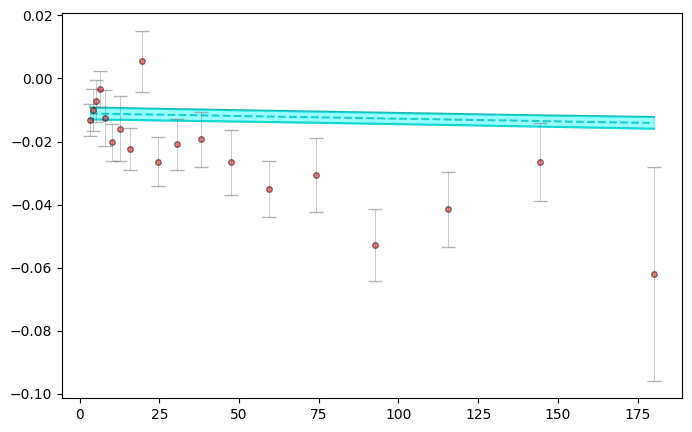

In [49]:
survey = "SDSS"
method = "common_abc"

# Load data
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
df = df[df["Nr"] > 2]

# Create richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

# Median richness in each bin
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

# ODR fit
ndata = len(df)
x = richness_bins_middle
y = logdist_binned_mean
yerr = logdist_binned_stderr

# Remove nans
crit = ~np.isnan(y)
x = x[crit]
y = y[crit]
yerr = yerr[crit]

# ODR stuff
linear = Model(f)
mydata = RealData(x=df["Nr"].to_numpy(), y=df[f"logdist_{method}"].to_numpy(), sy=df[f"logdist_err_{method}"].to_numpy())
myodr = ODR(mydata, linear, beta0=[0.0, 0.0])
myoutput = myodr.run()
m_pred, b_pred = myoutput.beta

# Create MC sample
n_trial = 10000
m_trial, b_trial = np.random.multivariate_normal(myoutput.beta, myoutput.cov_beta * myoutput.res_var, n_trial).T

x_trial = np.linspace(x.min(), x.max(), 1000)
y_trial = m_trial.reshape(-1, 1) * x_trial + b_trial.reshape(-1, 1)
y_pred = m_pred * x_trial + b_pred
y_lower = np.quantile(y_trial, q=0.16, axis=0)
y_upper = np.quantile(y_trial, q=0.84, axis=0)

# Actual data + error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, yerr=yerr, fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.5, zorder=3)

# Prediction + confidence intervals
ax.plot(x_trial, y_pred, c='lightseagreen', ls="--", zorder=2)
ax.plot(x_trial, y_upper, c='lightseagreen', ls="-", zorder=2)
ax.plot(x_trial, y_lower, c='lightseagreen', ls="-", zorder=2)
ax.fill_between(x_trial, y1=y_lower, y2=y_upper, color='cyan', alpha=0.4, zorder=2)
# ax.set_xscale("log")

m_mean = m_pred
m_std = np.std(m_trial)
m_stderr = m_std / np.sqrt(len(m_trial))

m_mean / m_std

## entire data

-0.5932052554392213

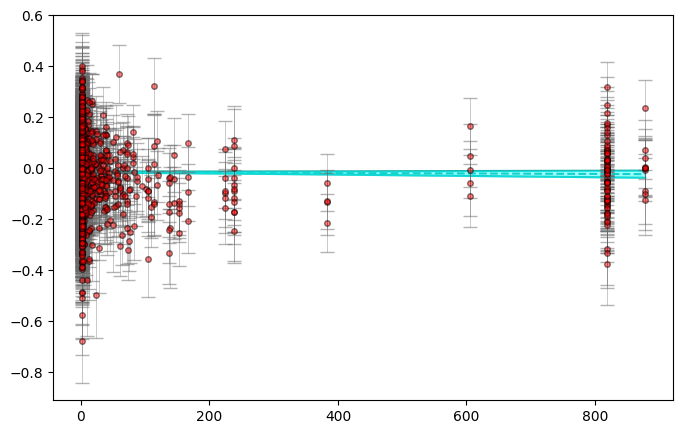

In [45]:
survey = "LAMOST"
method = "common_abc"

# Load data
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")

# Create richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

# Median richness in each bin
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', f"logdist_{method}"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

# ODR fit
ndata = len(df)
x = df["Nr"].to_numpy()
y = df[f"logdist_{method}"].to_numpy()
yerr = df[f"logdist_err_{method}"].to_numpy()

# Remove nans
crit = ~np.isnan(y)
x = x[crit]
yerr = yerr[crit]
y = y[crit]

# ODR stuff
linear = Model(f)
mydata = RealData(x=x, y=y, sy=yerr)
myodr = ODR(mydata, linear, beta0=[0.0, 0.0])
myoutput = myodr.run()
m_pred, b_pred = myoutput.beta

# Create MC sample
n_trial = 10000
m_trial, b_trial = np.random.multivariate_normal(myoutput.beta, myoutput.cov_beta * myoutput.res_var, n_trial).T

x_trial = np.linspace(x.min(), x.max(), 1000)
y_trial = m_trial.reshape(-1, 1) * x_trial + b_trial.reshape(-1, 1)
y_pred = m_pred * x_trial + b_pred
y_lower = np.quantile(y_trial, q=0.16, axis=0)
y_upper = np.quantile(y_trial, q=0.84, axis=0)

# Actual data + error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, yerr=yerr, fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.5, zorder=3)

# Prediction + confidence intervals
ax.plot(x_trial, y_pred, c='lightseagreen', ls="--", zorder=2)
ax.plot(x_trial, y_upper, c='lightseagreen', ls="-", zorder=2)
ax.plot(x_trial, y_lower, c='lightseagreen', ls="-", zorder=2)
ax.fill_between(x_trial, y1=y_lower, y2=y_upper, color='cyan', alpha=0.4, zorder=2)
# ax.set_xscale("log")

m_mean = m_pred
m_std = np.std(m_trial)
m_stderr = m_std / np.sqrt(len(m_trial))

m_mean / m_std